In [6]:
import numpy as np
import networkx as nx
from edge_fetch import edge_terrier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
# Initialize edgelist collector object
graph_collector = edge_terrier(filepath='hbn/derivatives/graphs/JHU/')
# Make a generator that yields all edgelists in filepath
filelist = graph_collector.convert_edgelist_all()
# Iterate
listOfLists = []
for edgelist in filelist:
    centrality = nx.eigenvector_centrality(edgelist[0])
    dictFull = dict(sorted((v, '{:0.2f}'.format(c)) for v, c in centrality.items()))
    list10 = list(dictFull.values())[0:3]
    if len(list10) == 3:
        listOfLists.append(list10)
X = np.stack(listOfLists)
print(X)
estimators = [('k_means_2', KMeans(n_clusters=2)),
              ('k_means_3', KMeans(n_clusters=3))]

sub-NDARDX770PJK_acq-64dir_dwi_JHU.edgelist is empty.
[['0.19' '0.19' '0.05']
 ['0.16' '0.17' '0.06']
 ['0.20' '0.11' '0.08']
 ['0.12' '0.02' '0.08']
 ['0.06' '0.01' '0.19']
 ['0.10' '0.04' '0.06']
 ['0.14' '0.03' '0.05']
 ['0.13' '0.17' '0.08']
 ['0.14' '0.17' '0.05']
 ['0.19' '0.08' '0.05']
 ['0.20' '0.16' '0.08']
 ['0.14' '0.09' '0.12']
 ['0.11' '0.03' '0.09']
 ['0.18' '0.07' '0.05']
 ['0.19' '0.18' '0.04']
 ['0.17' '0.18' '0.06']
 ['0.16' '0.16' '0.08']
 ['0.05' '0.05' '0.05']
 ['0.08' '0.10' '0.05']
 ['0.11' '0.18' '0.11']
 ['0.04' '0.02' '0.08']
 ['0.13' '0.08' '0.11']
 ['0.16' '0.14' '0.08']
 ['0.18' '0.17' '0.10']
 ['0.16' '0.14' '0.08']
 ['0.19' '0.19' '0.07']
 ['0.17' '0.07' '0.08']
 ['0.16' '0.18' '0.05']
 ['0.23' '0.16' '0.04']
 ['0.17' '0.16' '0.05']
 ['0.11' '0.18' '0.09']
 ['0.18' '0.18' '0.05']
 ['0.19' '0.19' '0.04']
 ['0.19' '0.16' '0.03']
 ['0.17' '0.14' '0.05']
 ['0.19' '0.17' '0.08']
 ['0.11' '0.10' '0.04']
 ['0.15' '0.15' '0.08']
 ['0.17' '0.11' '0.12']
 ['0.14' '

[0.05 0.06 0.08 0.08 0.19 0.06 0.05 0.08 0.05 0.05 0.08 0.12 0.09 0.05
 0.04 0.06 0.08 0.05 0.05 0.11 0.08 0.11 0.08 0.1  0.08 0.07 0.08 0.05
 0.04 0.05 0.09 0.05 0.04 0.03 0.05 0.08 0.04 0.08 0.12 0.03 0.1  0.18
 0.06 0.06 0.04 0.06 0.07 0.07 0.06 0.04 0.03 0.08 0.08 0.07 0.09 0.06
 0.08 0.03 0.1  0.07 0.07 0.11 0.04 0.07 0.04 0.08 0.08 0.05 0.11 0.11
 0.05 0.06 0.03 0.08 0.13 0.05 0.06 0.09 0.05 0.07 0.12 0.07 0.09 0.09
 0.03 0.09 0.09 0.1  0.08 0.06 0.07 0.07 0.09 0.07 0.06 0.08 0.07 0.09
 0.14]
[0.05 0.06 0.08 0.08 0.19 0.06 0.05 0.08 0.05 0.05 0.08 0.12 0.09 0.05
 0.04 0.06 0.08 0.05 0.05 0.11 0.08 0.11 0.08 0.1  0.08 0.07 0.08 0.05
 0.04 0.05 0.09 0.05 0.04 0.03 0.05 0.08 0.04 0.08 0.12 0.03 0.1  0.18
 0.06 0.06 0.04 0.06 0.07 0.07 0.06 0.04 0.03 0.08 0.08 0.07 0.09 0.06
 0.08 0.03 0.1  0.07 0.07 0.11 0.04 0.07 0.04 0.08 0.08 0.05 0.11 0.11
 0.05 0.06 0.03 0.08 0.13 0.05 0.06 0.09 0.05 0.07 0.12 0.07 0.09 0.09
 0.03 0.09 0.09 0.1  0.08 0.06 0.07 0.07 0.09 0.07 0.06 0.08 0.07 0.09

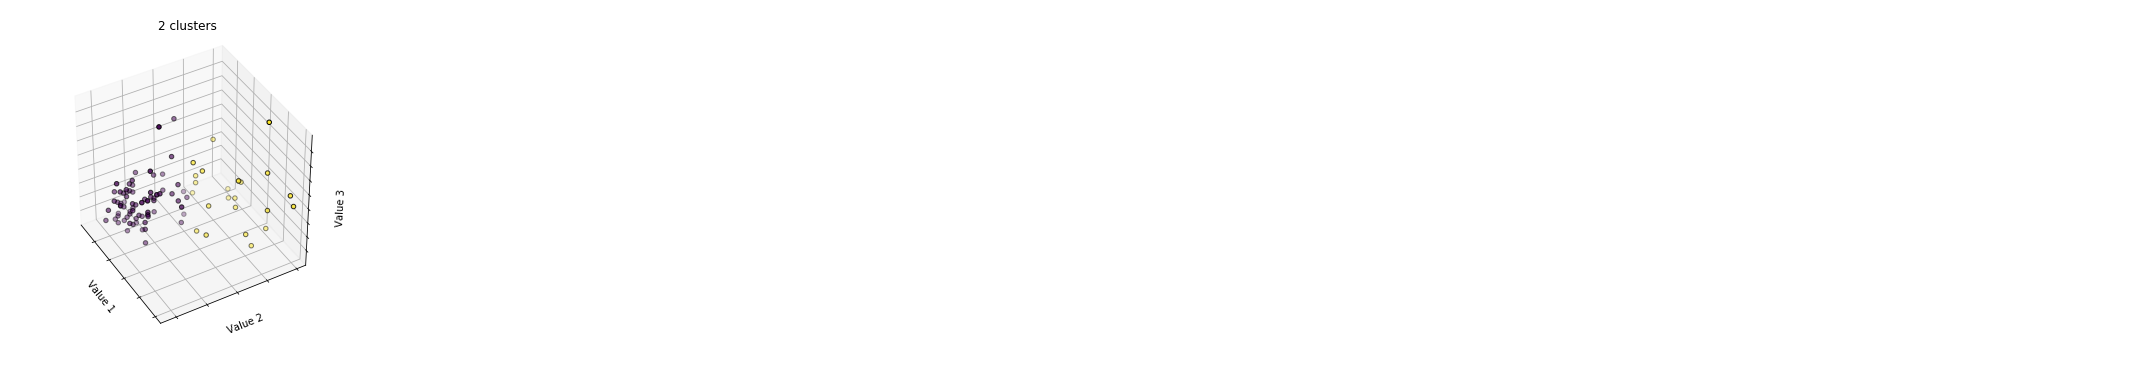

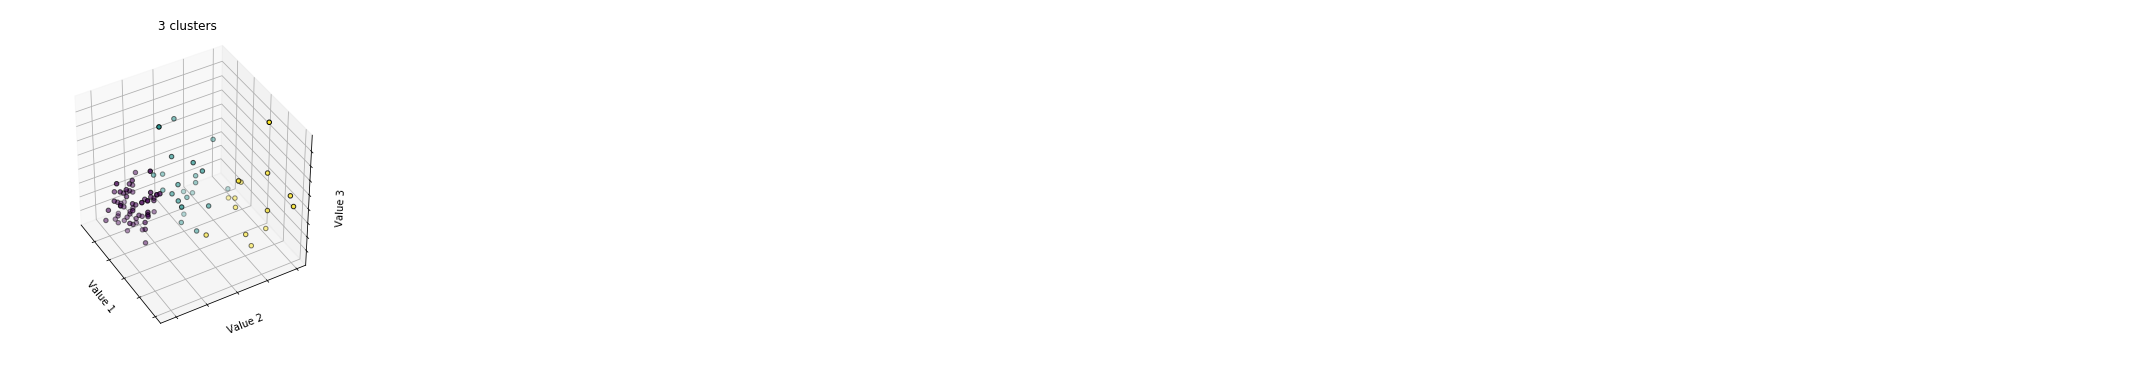

In [28]:
X = X.astype(float)
fignum = 1
titles = ['2 clusters', '3 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(10, 10))
    ax = Axes3D(fig, rect=[0, 0, .5, .5], elev=40, azim=150)
    est.fit(X)
    labels = est.labels_
    print(X[:,2])
    ax.scatter(X[:, 0], X[:, 1], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Value 1')
    ax.set_ylabel('Value 2')
    ax.set_zlabel('Value 3')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1